In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import sympy as sym

# Question 1

In [423]:
x = np.linspace(-20,20)
y = np.linspace(-20,20)
X, Y = np.meshgrid(x, y)

In [424]:
def f(x,y):
    return (x+1)**2 + 8*y**2 - 3*x - y + 1

In [425]:
Z = f(X,Y)

## Plot of f(x,y)

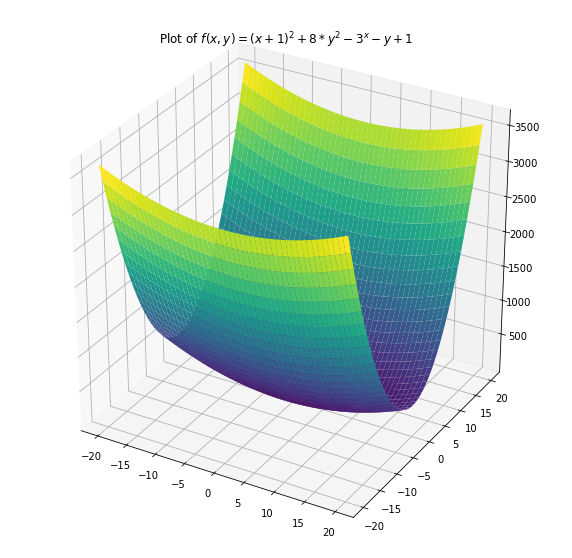

In [429]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Plot of $f(x,y) = (x+1)^2 + 8*y^2 - 3^x - y + 1$');

## Level Curves of f(x,y)

Text(0.5, 1.0, 'Level curves of $f(x,y) = (x+1)^2 + 8*y^2 - 3^x - y + 1$')

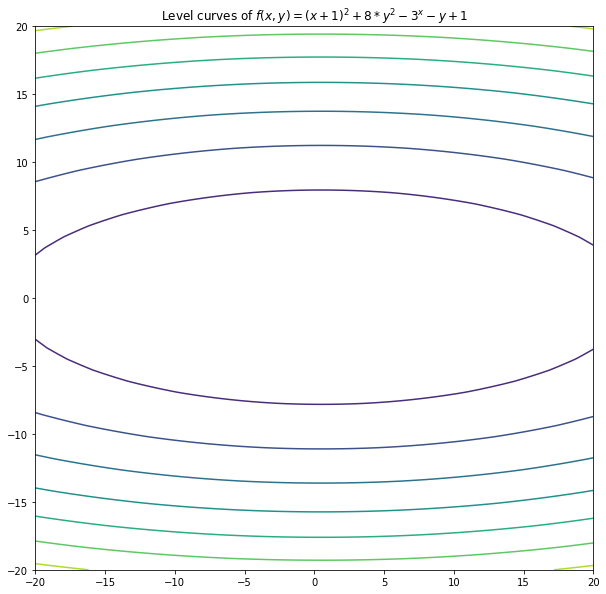

In [430]:
plt.figure(figsize=(10,10))
plt.contour(X,Y,Z)
plt.title('Level curves of $f(x,y) = (x+1)^2 + 8*y^2 - 3^x - y + 1$')

# Problem 2

In [448]:
x, y = sym.symbols('x y')

In [449]:
f = (x+1)**2 + 8*y**2 - 3*x - y + 1

The gradient of $f(x,y)$ is $\nabla f(x,y) = \left[ \frac{\partial{f}}{\partial{x}}\ \frac{\partial{f}}{\partial{y}} \right]$

In [450]:
f_xp = sym.diff(f,x)

In [451]:
f_yp = sym.diff(f,y)

In [452]:
grad = np.array([f_xp,f_yp])

In [453]:
print("The gradient of f is:",grad)

The gradient of f is: [2*x - 1 16*y - 1]


# Problem 3

Critical points are values $a$ such that $\nabla f(a) = 0$.

In [454]:
xcp = sym.solve(f_xp, x)  # Solves partial f partial x = 0 for x

In [455]:
ycp = sym.solve(f_yp, y)  # Solves partial f partial y = 0 for y

In [456]:
critPt = np.array([xcp[0], ycp[0]]) 

Critical point for f(x,y)

In [457]:
critPt

array([1/2, 1/16], dtype=object)

# Problem 4

Considering the example given in class:


Since $\nabla f = \begin{pmatrix} 2x-1\\16y-1 \end{pmatrix}$ I will set $Q=\begin{pmatrix}2&0\\0&16\end{pmatrix}$, $b = \begin{pmatrix}1 \\ 1 \end{pmatrix}$, and $\nabla f^T = \begin{pmatrix} 2x-1&16y-1 \end{pmatrix}$

In [458]:
Q = np.array([[2,0],[0,16]])

The following will print the number of iteration requires to locate the minima for every permutation of (i,j).

In [459]:
def a_k(x,y):
    alphaNume  = grad.T.dot(grad).subs({'x':x,'y':y})
    alphaDenom = grad.T.dot(Q.dot(grad)).subs({'x':x,'y':y})
    return float(alphaNume)/float(alphaDenom)

def f_x(x,y):
    return (a_k(x,y)*(grad[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad[1].subs({'x':x,'y':y})))

I = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
J = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

for i in I:
    for j in J:
        
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))

        print('starting at ',(i,j), ' the minima was found in ',len(X),' iterations')

starting at  (-5, -5)  the minima was found in  20  iterations
starting at  (-5, -4)  the minima was found in  22  iterations
starting at  (-5, -3)  the minima was found in  24  iterations
starting at  (-5, -2)  the minima was found in  28  iterations
starting at  (-5, -1)  the minima was found in  34  iterations
starting at  (-5, 0)  the minima was found in  46  iterations
starting at  (-5, 1)  the minima was found in  35  iterations
starting at  (-5, 2)  the minima was found in  29  iterations
starting at  (-5, 3)  the minima was found in  25  iterations
starting at  (-5, 4)  the minima was found in  23  iterations
starting at  (-5, 5)  the minima was found in  19  iterations
starting at  (-4, -5)  the minima was found in  18  iterations
starting at  (-4, -4)  the minima was found in  20  iterations
starting at  (-4, -3)  the minima was found in  24  iterations
starting at  (-4, -2)  the minima was found in  26  iterations
starting at  (-4, -1)  the minima was found in  32  iteration

Indeed, the critical point (0.5, 0.625) was found. The number of iterations varied from around 45 to 5 depending on the distance of the starting point from the critical point.

In [464]:
X[-5:-1]

[5, 0.568877602031634, 0.560267878810626, 0.500000753908674]

In [465]:
Y[-5:-1]

[5, 4.99348117338879, 0.0624899291432026, 0.0625000007716039]

# Problem 5
## Method 1

I believe that this question has been mis-stated and I have performed it in two different ways in order to illustrate this. First, changing the coefficient 8 to 80 in the original equation (which is the only place where the number 8 occurs).

In [495]:
x, y = sym.symbols('x y')

In [496]:
f = (x+1)**2 + 80*y**2 - 3*x - y + 1

In [497]:
f

-3*x + 80*y**2 - y + (x + 1)**2 + 1

In [498]:
f_xp = sym.diff(f,x)

In [499]:
f_yp = sym.diff(f,y)

In [500]:
grad = np.array([f_xp,f_yp])

In [501]:
xcp = sym.solve(f_xp, x)  # Solves partial f partial x = 0 for x

In [502]:
ycp = sym.solve(f_yp, y)  # Solves partial f partial y = 0 for y

In [503]:
critPt = np.array([xcp[0], ycp[0]]) 

Critical point for f(x,y) have changes to [0.5, 0.00625]

In [504]:
critPt

array([1/2, 1/160], dtype=object)

Now $Q=\begin{pmatrix}2&0\\0&160\end{pmatrix}$

In [505]:
Q = np.array([[2,0],[0,160]])

In [506]:
def a_k(x,y):
    alphaNume  = grad.T.dot(grad).subs({'x':x,'y':y})
    alphaDenom = grad.T.dot(Q.dot(grad)).subs({'x':x,'y':y})
    return float(alphaNume)/float(alphaDenom)

def f_x(x,y):
    return (a_k(x,y)*(grad[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad[1].subs({'x':x,'y':y})))

I = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
J = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

for i in I:
    for j in J:
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))
            
        print('starting at ',(i,j), ' the minima was found in ',len(X),' iterations')

starting at  (-5, -5)  the minima was found in  12  iterations
starting at  (-5, -4)  the minima was found in  22  iterations
starting at  (-5, -3)  the minima was found in  48  iterations
starting at  (-5, -2)  the minima was found in  90  iterations
starting at  (-5, -1)  the minima was found in  154  iterations
starting at  (-5, 0)  the minima was found in  420  iterations
starting at  (-5, 1)  the minima was found in  157  iterations
starting at  (-5, 2)  the minima was found in  91  iterations
starting at  (-5, 3)  the minima was found in  49  iterations
starting at  (-5, 4)  the minima was found in  21  iterations
starting at  (-5, 5)  the minima was found in  11  iterations
starting at  (-4, -5)  the minima was found in  10  iterations
starting at  (-4, -4)  the minima was found in  20  iterations
starting at  (-4, -3)  the minima was found in  46  iterations
starting at  (-4, -2)  the minima was found in  86  iterations
starting at  (-4, -1)  the minima was found in  152  itera

Again, the critical point has been successfully identified but the iterations required vary much more, from 420 to 5.

In [507]:
X[-5:-1]

[5, 0.0562570477485768, 0.0618038414248083, 0.499959298409206]

In [476]:
Y[-5:-1]

[5, 4.99437568345698, 0.00624406040452019, 0.00625004303117452]

## Method 2
Next, instead of changing the original equation, I will increase the value of 16 in Q by a factor of ten to make it 160.

In [466]:
x, y = sym.symbols('x y')

The original equation remains the same.

In [508]:
f = (x+1)**2 + 8*y**2 - 3*x - y + 1

In [509]:
f

-3*x + 8*y**2 - y + (x + 1)**2 + 1

In [510]:
f_xp = sym.diff(f,x)

In [511]:
f_yp = sym.diff(f,y)

In [512]:
grad = np.array([f_xp,f_yp])

In [513]:
xcp = sym.solve(f_xp, x)  # Solves partial f partial x = 0 for x

In [514]:
ycp = sym.solve(f_yp, y)  # Solves partial f partial y = 0 for y

In [515]:
critPt = np.array([xcp[0], ycp[0]]) 

Critical point for f(x,y) also stay the same.

In [516]:
critPt

array([1/2, 1/16], dtype=object)

Now $Q=\begin{pmatrix}2&0\\0&160\end{pmatrix}$

In [517]:
Q = np.array([[2,0],[0,160]])

In [518]:
def a_k(x,y):
    alphaNume  = grad.T.dot(grad).subs({'x':x,'y':y})
    alphaDenom = grad.T.dot(Q.dot(grad)).subs({'x':x,'y':y})
    return float(alphaNume)/float(alphaDenom)

def f_x(x,y):
    return (a_k(x,y)*(grad[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad[1].subs({'x':x,'y':y})))

I = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
J = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

for i in I:
    for j in J:
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))
            
        print('starting at ',(i,j), ' the minima was found in ',len(X),' iterations')

starting at  (-5, -5)  the minima was found in  42  iterations
starting at  (-5, -4)  the minima was found in  42  iterations
starting at  (-5, -3)  the minima was found in  35  iterations
starting at  (-5, -2)  the minima was found in  34  iterations
starting at  (-5, -1)  the minima was found in  35  iterations
starting at  (-5, 0)  the minima was found in  29  iterations
starting at  (-5, 1)  the minima was found in  28  iterations
starting at  (-5, 2)  the minima was found in  24  iterations
starting at  (-5, 3)  the minima was found in  36  iterations
starting at  (-5, 4)  the minima was found in  39  iterations
starting at  (-5, 5)  the minima was found in  42  iterations
starting at  (-4, -5)  the minima was found in  46  iterations
starting at  (-4, -4)  the minima was found in  44  iterations
starting at  (-4, -3)  the minima was found in  69  iterations
starting at  (-4, -2)  the minima was found in  27  iterations
starting at  (-4, -1)  the minima was found in  29  iteration

Here the maximum number of iterations to find the minima is similar to those in question 4 however the interations never reach the minimum of 5 that was found in question 4.  Now th minimum number of iteration is 16. This indicated that there is much more oscillation around the critical point than before.

In [519]:
X[-5:-1]

[0.499893115638168, 0.499936177621616, 0.499962078676806, 0.499977397375639]

In [520]:
Y[-5:-1]

[0.0624981525926238,
 0.0625010962624776,
 0.0624993460531044,
 0.0625003888077864]

# Problem 6

In [521]:
x, y = sym.symbols('x y')

In [522]:
f = (x+1)**2 + 8*y**2 - 3*x - y + 1

In [523]:
f_xp = sym.diff(f,x)

In [524]:
f_yp = sym.diff(f,y)

The hessian matrix is a matrix of partial second derivatives. $H=\begin{pmatrix}\frac{\partial^2{f}}{\partial{x}^2}&\frac{\partial^2{f}}{\partial{x}\partial{y}}\\\frac{\partial^2{f}}{\partial{y}\partial{x}}&\frac{\partial^2{f}}{\partial{y}^2}\end{pmatrix}$.  It will be a definite-positive diagonal matrix in this case since there will be no cross products.

In [525]:
H = np.matrix([[f.diff(x,x),f.diff(x,y)],[f.diff(y,x),f.diff(y,y)]])
print(H)

[[2 0]
 [0 16]]


$x_{n+1} = x_n - \frac{f'(x_n)}{f"(x_n)}$

In [419]:
def f_x(x,y):
    return float(f_xp.subs({'x':x,'y':y})/f_xx)

def f_y(x,y):
    return float(f_yp.subs({'x':x,'y':y})/f_yy)

I = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
J = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

for i in I:
    for j in J:
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))
            
        print('starting at ',(i,j), ' the minima was found in ',len(X),' iterations')

starting at  (-5, -5)  the minima was found in  4  iterations
starting at  (-5, -4)  the minima was found in  4  iterations
starting at  (-5, -3)  the minima was found in  4  iterations
starting at  (-5, -2)  the minima was found in  4  iterations
starting at  (-5, -1)  the minima was found in  4  iterations
starting at  (-5, 0)  the minima was found in  4  iterations
starting at  (-5, 1)  the minima was found in  4  iterations
starting at  (-5, 2)  the minima was found in  4  iterations
starting at  (-5, 3)  the minima was found in  4  iterations
starting at  (-5, 4)  the minima was found in  4  iterations
starting at  (-5, 5)  the minima was found in  4  iterations
starting at  (-4, -5)  the minima was found in  4  iterations
starting at  (-4, -4)  the minima was found in  4  iterations
starting at  (-4, -3)  the minima was found in  4  iterations
starting at  (-4, -2)  the minima was found in  4  iterations
starting at  (-4, -1)  the minima was found in  4  iterations
starting at  (

In [420]:
X

[5, 4.5, 0.5, 0.5]

In [421]:
Y

[5, 4.9375, 0.0625, 0.0625]

# Problem 7

In [639]:
x = np.linspace(-20,20)
y = np.linspace(-20,20)
X, Y = np.meshgrid(x, y)

In [640]:
def g(x,y):
    return ((x+1)**2 + y**2)*((x-1)**2 + y**2)

In [641]:
Z = g(X,Y)

## Plot of g(x,y)

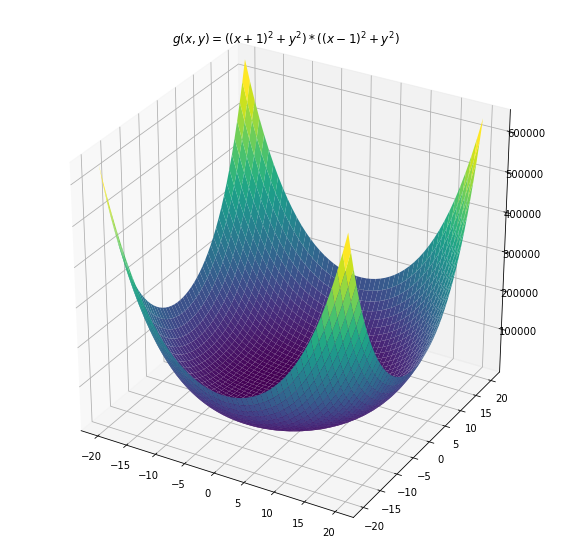

In [642]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$g(x,y) = ((x+1)^2 + y^2)*((x-1)^2 + y^2)$');

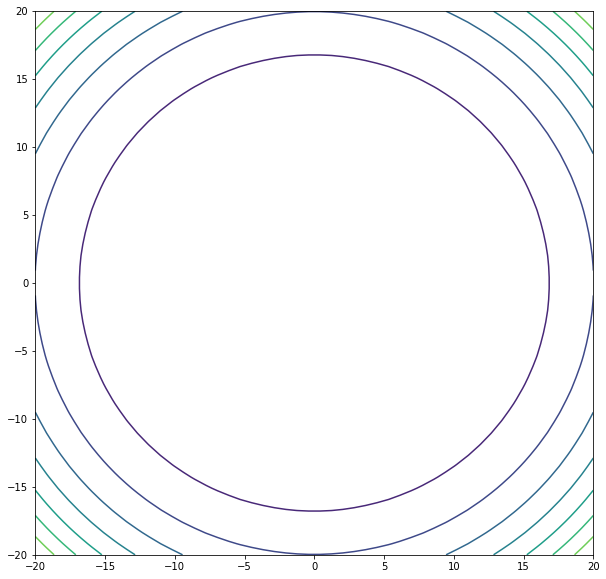

In [643]:
plt.figure(figsize=(10,10))
plt.contour(X,Y,Z)

In [644]:
x, y = sym.symbols('x y')

In [645]:
g = ((x+1)**2 + y**2)*((x-1)**2 + y**2)

In [646]:
g_xp = g.diff(x)

In [647]:
g_yp = g.diff(y)

In [648]:
grad = np.matrix([[g_xp],[g_yp]])
print(grad)

[[(2*x - 2)*(y**2 + (x + 1)**2) + (2*x + 2)*(y**2 + (x - 1)**2)]
 [2*y*(y**2 + (x - 1)**2) + 2*y*(y**2 + (x + 1)**2)]]


$\nabla f = \begin{pmatrix}(2x - 2)(y^2 + (x + 1)^2) + (2x + 2)(y^2 + (x - 1)^2)\\2y(y^2 + (x - 1)^2) + 2y(y^2 + (x + 1)^2)\end{pmatrix}$

There are now cross terms in the hessian matrix that must be accounted for. The hessian matrix is:

In [615]:
Q = np.matrix([[g.diff(x,x), g.diff(x,y)],[g.diff(y,x),g.diff(y,y)]])
Q

matrix([[2*(2*y**2 + (x - 1)**2 + 4*(x - 1)*(x + 1) + (x + 1)**2), 8*x*y],
        [8*x*y, 2*(6*y**2 + (x - 1)**2 + (x + 1)**2)]], dtype=object)

$Q = H = \begin{pmatrix}2(2y^2 + (x - 1)^2 + 4(x - 1)(x + 1) + (x + 1)^2)&8xy\\8xy&2(6y^2 + (x - 1)^2 + (x + 1)^2)\end{pmatrix}$

I got a divide by zero error in the calculation of $\alpha_k$.  I implemented a default values of 0.1 for when the denominator of the calculation equals 0. The lion's share of the computation will definitely occur in the calculation of $\alpha_k$.

In [652]:
def a_k(x,y):
    alphaNume  = grad.T.dot(grad).all().subs({'x':x,'y':y})
    alphaDenom = grad.T.dot(Q.dot(grad)).all().subs({'x':x,'y':y})
    if alphaDenom != 0:
        return float(alphaNume)/float(alphaDenom)
    else:
        return 0.1

def f_x(x,y):
    return (a_k(x,y)*(grad[0].all().subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad[1].all().subs({'x':x,'y':y})))

I = [-5,-4,-3,-2,0,-1,1,2,3,4,5]
J = [-5,-4,-3,-2,0,-1,1,2,3,4,5]

for i in I:
    for j in J:
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))
            
        print('starting at ',(i,j), ' the minima was found in ',len(X),' iterations')

starting at  (-5, -5)  the minima was found in  10  iterations
starting at  (-5, -4)  the minima was found in  10  iterations
starting at  (-5, -3)  the minima was found in  10  iterations
starting at  (-5, -2)  the minima was found in  9  iterations
starting at  (-5, 0)  the minima was found in  2  iterations
starting at  (-5, -1)  the minima was found in  9  iterations
starting at  (-5, 1)  the minima was found in  7  iterations
starting at  (-5, 2)  the minima was found in  7  iterations
starting at  (-5, 3)  the minima was found in  8  iterations
starting at  (-5, 4)  the minima was found in  8  iterations
starting at  (-5, 5)  the minima was found in  8  iterations
starting at  (-4, -5)  the minima was found in  11  iterations
starting at  (-4, -4)  the minima was found in  10  iterations
starting at  (-4, -3)  the minima was found in  9  iterations
starting at  (-4, -2)  the minima was found in  9  iterations
starting at  (-4, 0)  the minima was found in  2  iterations
starting a

The minima was found in 2 to 14 iterations (depending on starting positions), and the minima found was at (1,0) which is reasonable considering the plot above.

In [653]:
X[-1]

1.00000000398117

In [654]:
Y[-1]

5.17884107231308e-15